# Breast Cancer Dataset

Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer

Step 2: Reading data from .csv file

In [2]:
breast_cancer_df = pd.read_csv("breast_cancer_2.csv")

Step 3: Validating the dataset 

In [3]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Unnamed: 0                  277 non-null    int64
 1   deg-malig                   277 non-null    int64
 2   Class_no-recurrence-events  277 non-null    int64
 3   Class_recurrence-events     277 non-null    int64
 4   age_20-29                   277 non-null    int64
 5   age_30-39                   277 non-null    int64
 6   age_40-49                   277 non-null    int64
 7   age_50-59                   277 non-null    int64
 8   age_60-69                   277 non-null    int64
 9   age_70-79                   277 non-null    int64
 10  menopause_ge40              277 non-null    int64
 11  menopause_lt40              277 non-null    int64
 12  menopause_premeno           277 non-null    int64
 13  tumor-size_0-4              277 non-null    int64
 14  tumor-size

In [4]:
breast_cancer_df.describe()

,Unnamed: 0,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,...,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
count,277.00000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,138.00000,2.057762,0.707581,0.292419,0.003610,0.129964,0.321300,0.328520,0.198556,0.018051,...,0.202166,0.523466,0.476534,0.075812,0.382671,0.339350,0.083032,0.119134,0.776173,0.223827
std,80.10722,0.729989,0.455697,0.455697,0.060084,0.336872,0.467821,0.470525,0.399635,0.133375,...,0.402342,0.500353,0.500353,0.265177,0.486919,0.474346,0.276431,0.324532,0.417562,0.417562
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,138.00000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,207.00000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,276.00000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Step 4: Dropping the Unnamed Columns  

In [5]:
breast_cancer_df =breast_cancer_df.drop('Unnamed: 0',axis=1)

In [6]:
breast_cancer_df.head()

,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,...,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,2,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
4,2,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


Step 5: Checking the column list

In [7]:
columns = breast_cancer_df.columns
columns

Index(['deg-malig', 'Class_no-recurrence-events', 'Class_recurrence-events',
       'age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_ge40', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_0-4', 'tumor-size_10-14', 'tumor-size_15-19',
       'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34',
       'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49',
       'tumor-size_5-9', 'tumor-size_50-54', 'inv-nodes_0-2',
       'inv-nodes_12-14', 'inv-nodes_15-17', 'inv-nodes_24-26',
       'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11', 'node-caps_no',
       'node-caps_yes', 'breast_left', 'breast_right', 'breast-quad_central',
       'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_no', 'irradiat_yes'],
      dtype='object')

# Train and Test Dataset

In [8]:
X= breast_cancer_df.iloc[:,:-1]
y= breast_cancer_df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Model 1 : Descion tree

C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        11

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



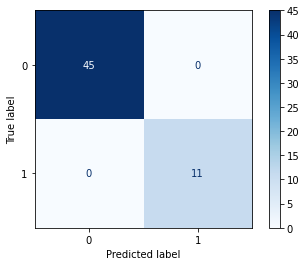

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

clf_dt=DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=2, min_samples_leaf=4)
clf_dt.fit(X_train,y_train)
y_predict=clf_dt.predict(X_test)
plot_confusion_matrix(clf_dt,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score

score1=accuracy_score(y_test,y_predict)
print("Accuracy without cross-validation : {}".format(score1))

score2 = cross_val_score(clf_dt, X_train, y_train, cv=10)
print(score2)
print("Accuracy after cross-validation : {} (+/- {})".format(score2.mean(),score2.std()))

score3 = cross_val_score(clf_dt, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3)
print("Cohen Kappa Score after cross-validation : {} (+/- {})".format(score3.mean(),score3.std()))

Accuracy without cross-validation : 1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy after cross-validation : 1.0 (+/- 0.0)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cohen Kappa Score after cross-validation : 1.0 (+/- 0.0)


# Model 2 : Random Forest

C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        11

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



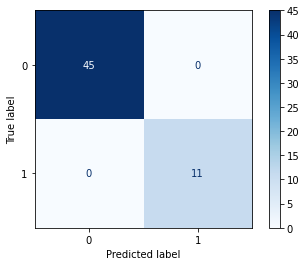

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [15]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Accuracy (without cross-validation) : 1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy (after cross-validation): 1.0 (+/- 0.0)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cohen Kappa Score (after cross-validation): 1.0 (+/- 0.0)


# Original dataset divided into 10 bins of imbalance dataset

In [16]:
target_count=breast_cancer_df['Class_no-recurrence-events'].value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)

1    196
0     81
Name: Class_no-recurrence-events, dtype: int64
70.7581227436823


In [17]:
def create_bins (df,no_of_bins,orig_imbalance):
  df_class0=df[df['Class_no-recurrence-events']==0]
  df_class1=df[df['Class_no-recurrence-events']==1]

  len0=int(len(df_class0)/no_of_bins)
  len1=int(len(df_class1)/no_of_bins)

  ind0=0
  ind1=0
  start0=0
  start1=0

  bins=[]

  print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
  for i in range(no_of_bins):
    ind0+=len0
    ind1+=len1
    bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
    target_cnt=bin_['Class_no-recurrence-events'].value_counts()
    imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(bin_.values)
    start0+=len0
    start1+=len1

  return bins

In [18]:
bins= create_bins(breast_cancer_df,10, imbalance_target) #Divding the dataset into 10 bins

Original Imbalance in the dataset: 70.7581227436823 %
Class imbalance ratio in bin 0 : 70.37037037037037 %
Class imbalance ratio in bin 1 : 70.37037037037037 %
Class imbalance ratio in bin 2 : 70.37037037037037 %
Class imbalance ratio in bin 3 : 70.37037037037037 %
Class imbalance ratio in bin 4 : 70.37037037037037 %
Class imbalance ratio in bin 5 : 70.37037037037037 %
Class imbalance ratio in bin 6 : 70.37037037037037 %
Class imbalance ratio in bin 7 : 70.37037037037037 %
Class imbalance ratio in bin 8 : 70.37037037037037 %
Class imbalance ratio in bin 9 : 70.37037037037037 %


In [19]:
model_accuracies={} #A dictionary to save the accuracies for the different permutations of the bins
model_kappa_scores={} #A dictionary to save the cohen kappa scores for the different permutations of the bin

# Analyzing the number of clusters using Elbow method and Silhouette method

C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


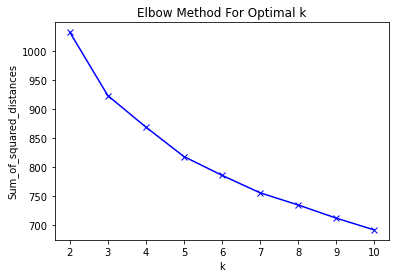

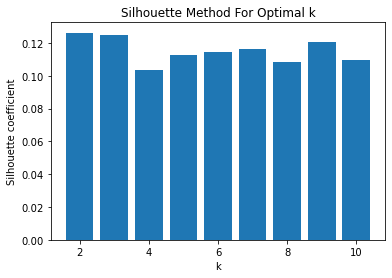

In [20]:
#***** CHANGE MANUALLY DURING EACH ITERATION *****#

i=9 # The bin index to be left-out while training, and used only for testing 

#************************************************#

#CREATE TESTING DATA

leave_out=i #for indexing while saving the model accuracies to a dictionary
test_data=bins[i] 

#CREATE TRAINING DATA

compile9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining data from all other bins except the left-out one
data=pd.DataFrame(compile9)
data.columns=columns
mms=MinMaxScaler() #normalizing the data
mms.fit(data)
data_transformed=mms.transform(data)

#ELBOW METHOD TO IDENTIFY THE NUMBER OF CLUSTERS

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#SILHOUETTE METHOD TO IDENTIFY THE NUMBER OF CLUSTERS
K = range(2,11)
no_of_clusters=[]
silhouette_scores=[]

for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    preds=km.fit_predict(data_transformed)
    centers=km.cluster_centers_

    score=silhouette_score(data_transformed,preds)

    no_of_clusters.append(k)
    silhouette_scores.append(score)

plt.ylabel("Silhouette coefficient")
plt.xlabel("k")
plt.title('Silhouette Method For Optimal k')
plt.bar(no_of_clusters,silhouette_scores)
plt.show()

In [21]:
#*****CHANGE MANUALLY DURING EACH ITERATION*****#

num_of_clusters=8 #Decided after looking at the plots from the previous cell 

#***********************************************#

min_class=0 # The minority class label
max_class=1 # The majority class label

#***********************************************#

#FITTING A K-MEANS CLUSTERING MODEL

kmeans = KMeans(n_clusters=num_of_clusters, random_state=1)
kmeans.fit_predict(data_transformed)

cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]
  
g=globals() #To facilitate naming dynamically

#Filtering out the data belonging to each cluster

for i in range(0,num_of_clusters):
  g['cluster_{}'.format(i)] = cluster_df[cluster_df['Cluster label']==i]

#Checking for number of entries from minority class in each cluster

for i in range(0,num_of_clusters):
  g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['Class_no-recurrence-events']==min_class]
  if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
    g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
    g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
    g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
    g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
    g['Class_val_{}{}'.format(i,min_class)]=min_class
  else:
    g['Class_val_{}{}'.format(i,min_class)]=max_class
  
#CREATING THE TEST DATA

test_cluster=pd.DataFrame(test_data)
test_cluster.columns=breast_cancer_df.columns
test_cluster["Cluster label"]=kmeans.predict(test_data)
cols=list(test_cluster.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
test_cluster=test_cluster[cols]

#Dividing the results based on cluster label, to predict the class labels of the corresponding entries

for i in range(0,num_of_clusters):
  g['test_{}'.format(i)] = test_cluster[test_cluster['Cluster label']==i]
  if(len(g['test_{}'.format(i)])!=0):
    if(g['Class_val_{}{}'.format(i,min_class)]==min_class): #Checking if the dataset contains values from both the classes
      g['X_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,:-1]
      g['y_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,-1]
      g['y_pred{}'.format(i)]=g['clf_{}'.format(i)].predict(g['X_test{}'.format(i)])
      g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]
    else:
      g['y_pred{}'.format(i)]=np.full(len(g['test_{}'.format(i)]),max_class)
      g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]

#Compiling the results and predictions for performance checking

final_test=pd.concat([g['test_{}'.format(i)] for i in range(0,num_of_clusters) if(len(g['test_{}'.format(i)])!=0)])
trial_accuracy=accuracy_score(final_test.iloc[:,-2],final_test.iloc[:,-1]) #computing accuracy based on real class labels
print("Accuracy : {}".format(trial_accuracy))

model_accuracies[leave_out]=trial_accuracy #Saving the accuracy for this permutation
trial_kappa =cohen_kappa_score(y_test, y_predict, labels=None, weights=None)
model_kappa_scores[leave_out]=trial_kappa #Saving the cohen kappa score for this permutation

C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Accuracy : 0.8888888888888888


C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
model_accuracies

{9: 0.8888888888888888}

In [23]:
model_kappa_scores

{9: 1.0}

In [24]:
acc_values=np.array([model_accuracies[k] for k in model_accuracies])
acc_values

array([0.88888889])

In [25]:
print("Decision Tree model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))
print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))
print("New model:")
print("Accuracy : {} (+/- {})".format(acc_values.mean(),acc_values.std()))

Decision Tree model:
Accuracy (after cross-validation): 1.0 (+/- 0.0)
Random Forest model:
Accuracy (after cross-validation): 1.0 (+/- 0.0)
New model:
Accuracy : 0.8888888888888888 (+/- 0.0)


In [26]:
kappa_values=np.array([model_kappa_scores[k] for k in model_kappa_scores])
kappa_values

array([1.])

In [27]:
print("Kappa Scores:")
print("Decision Tree: : {} (+/- {})".format(score3.mean(),score3.std()))
print("Random Forest: : {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))
print("New Model: : {} (+/- {})".format(kappa_values.mean(),kappa_values.std()))

Kappa Scores:
Decision Tree: : 1.0 (+/- 0.0)
Random Forest: : 1.0 (+/- 0.0)
New Model: : 1.0 (+/- 0.0)


# Permutation Tests

In [28]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
  concat = np.concatenate((data_1,data_2))
  cnt=0
  for i in range(0,iterations):
    perm = np.random.permutation(concat)
    pcurrent = perm[:len(data_1)]
    pnew = perm[len(data_1):]
    mean_perm_current=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_current
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iterations
  return p_value

In [29]:
acc_old_1 = np.array([1,1,1,1,1,1,1,1,1,1])
kappa_old_1=np.array([1,1,1,1,1,1,1,1,1,1])
acc_old_2=np.array([1,1,1,1,1,1,1,1,1,1])
kappa_old_2=np.array([1,1,1,1,1,1,1,1,1,1])

acc_new=np.array([0.96296296, 0.92592593, 1.        , 0.96296296, 0.92592593, 1.        , 1.        , 0.88888889, 0.88888889, 0.96296296])
kappa_new=np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#Accuracy: DT and new
mean_old=acc_old_1.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_1,acc_new,t_obs)
print("Accuracy comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Accuracy: RF and new
mean_old=acc_old_2.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_2,acc_new,t_obs)
print("Accuracy comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))

#Kappa: DT and new
mean_old=kappa_old_1.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_1,kappa_new,t_obs)
print("Kappa comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Kappa: RF and new
mean_old=kappa_old_2.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_2,acc_new,t_obs)
print("Kappa comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))


Accuracy comparison between Decision Tree and new method:
p-value: 0.99858
Accuracy comparison between Random Forest and new method:
p-value: 0.99846
Kappa comparison between Decision Tree and new method:
p-value: 0.0
Kappa comparison between Random Forest and new method:
p-value: 0.50132
